In [1]:
from molmap.model import RegressionEstimator, MultiClassEstimator, MultiLabelEstimator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from molmap import dataset
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from molmap import MolMap
from molmap import feature
# 打开molmap的环境，molmap.model;molmap等宏包会自动导入到这个环境中。
# from tensorflow.keras.datasets import mnist
import tensorflow as tf
import os
from tensorflow.keras.layers import Input,Dense, Conv2D, Conv2DTranspose, MaxPooling2D, Flatten, UpSampling2D, Reshape
from tensorflow.keras.models import Model,Sequential
from joblib import load,dump #导入模型 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gpuid = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = gpuid
physical_gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_gpus[0], True)

In [3]:
X2 = load('/raid/wx_home/learning/2_190w_model_new/melucule2.data2')

In [4]:
X2.shape

(1937109, 37, 36, 3)

In [5]:
X2_new2 = X2[:,:,:,1]

In [6]:
X3 = X2_new2[:10]

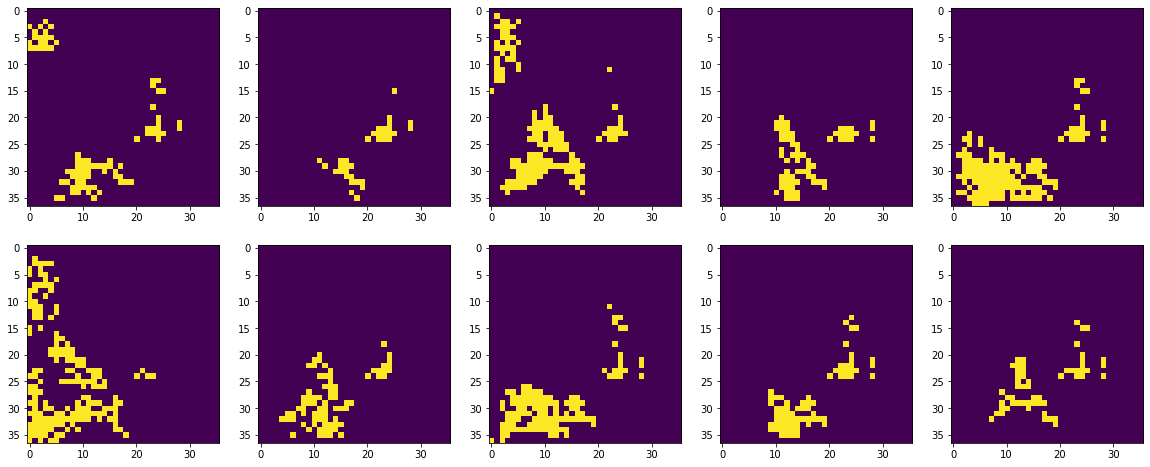

In [7]:
fig = plt.figure(figsize = (20,8))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    ax.imshow(X3[i])

In [8]:
class Encoder(Model):
    def __init__(self):
        super().__init__()
        self.flatten = Flatten()
        self.d1 = Dense(1024, activation='relu')
        self.d2 = Dense(512, activation='relu')
        self.d3 = Dense(128, activation='relu')
        self.d4 = Dense(64, activation='relu')
        self.d5 = Dense(3, activation='relu')
        
    def call(self,x):
        x = self.flatten(x)
        x = self.d1(x)
        x = self.d2(x)
        x = self.d3(x)
        x = self.d4(x)
        return self.d5(x)       
    
    
class Decoder(Model):
    def __init__(self):
        super().__init__()
        self.d6 = Dense(64, activation='relu')
        self.d7 = Dense(128, activation='relu')
        self.d8 = Dense(512, activation='relu')
        self.d9 = Dense(1024, activation='relu')
        self.d10 = Dense(1332, activation='sigmoid')
        self.re = Reshape((37,36))
    
    def call(self,x):
        x = self.d6(x)
        x = self.d7(x)
        x = self.d8(x)
        x = self.d9(x)
        x = self.d10(x)
        return  self.re(x)
        
class Autoencoder(Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
        
    def call(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [9]:
model = Autoencoder()
model.compile(optimizer='Adam',loss='binary_crossentropy')
history1 = model.fit(X2_new2, X2_new2, batch_size=768, epochs=100)

Epoch 1/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0496
Epoch 2/100
2523/2523 [==============================] - 20s 8ms/step - loss: 0.0360
Epoch 3/100
2523/2523 [==============================] - 19s 8ms/step - loss: 0.0327
Epoch 4/100
2523/2523 [==============================] - 19s 8ms/step - loss: 0.0316
Epoch 5/100
2523/2523 [==============================] - 20s 8ms/step - loss: 0.0309
Epoch 6/100
2523/2523 [==============================] - 19s 8ms/step - loss: 0.0306
Epoch 7/100
2523/2523 [==============================] - 19s 8ms/step - loss: 0.0302
Epoch 8/100
2523/2523 [==============================] - 19s 8ms/step - loss: 0.0300
Epoch 9/100
2523/2523 [==============================] - 19s 8ms/step - loss: 0.0296
Epoch 10/100
2523/2523 [==============================] - 20s 8ms/step - loss: 0.0296
Epoch 11/100
2523/2523 [==============================] - 19s 8ms/step - loss: 0.0295
Epoch 12/100
2523/2523 [==============================] - 19s 8

In [10]:
model.compile(optimizer='Adam',loss='mse')
history2 = model.fit(X2_new2, X2_new2, batch_size=768, epochs=100)

Epoch 1/100
2523/2523 [==============================] - 19s 7ms/step - loss: 0.0083
Epoch 2/100
2523/2523 [==============================] - 18s 7ms/step - loss: 0.0082
Epoch 3/100
2523/2523 [==============================] - 18s 7ms/step - loss: 0.0081
Epoch 4/100
2523/2523 [==============================] - 18s 7ms/step - loss: 0.0080
Epoch 5/100
2523/2523 [==============================] - 18s 7ms/step - loss: 0.0080
Epoch 6/100
2523/2523 [==============================] - 18s 7ms/step - loss: 0.0081
Epoch 7/100
2523/2523 [==============================] - 19s 8ms/step - loss: 0.0080
Epoch 8/100
2523/2523 [==============================] - 18s 7ms/step - loss: 0.0080
Epoch 9/100
2523/2523 [==============================] - 18s 7ms/step - loss: 0.0079
Epoch 10/100
2523/2523 [==============================] - 18s 7ms/step - loss: 0.0079
Epoch 11/100
2523/2523 [==============================] - 18s 7ms/step - loss: 0.0079
Epoch 12/100
2523/2523 [==============================] - 18s 7

<AxesSubplot:>

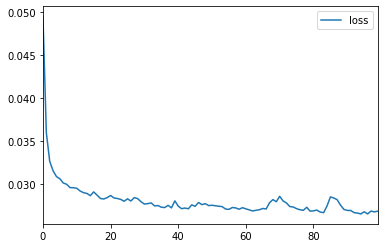

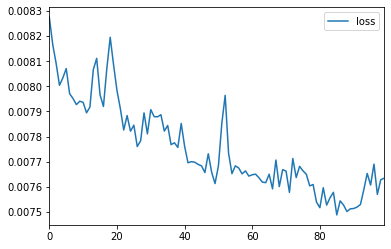

In [11]:
pd.DataFrame(history1.history).plot()
pd.DataFrame(history2.history).plot()

In [16]:
model.save('9_2_model')

In [12]:
y_pre = model.predict(X2_new2[:10])

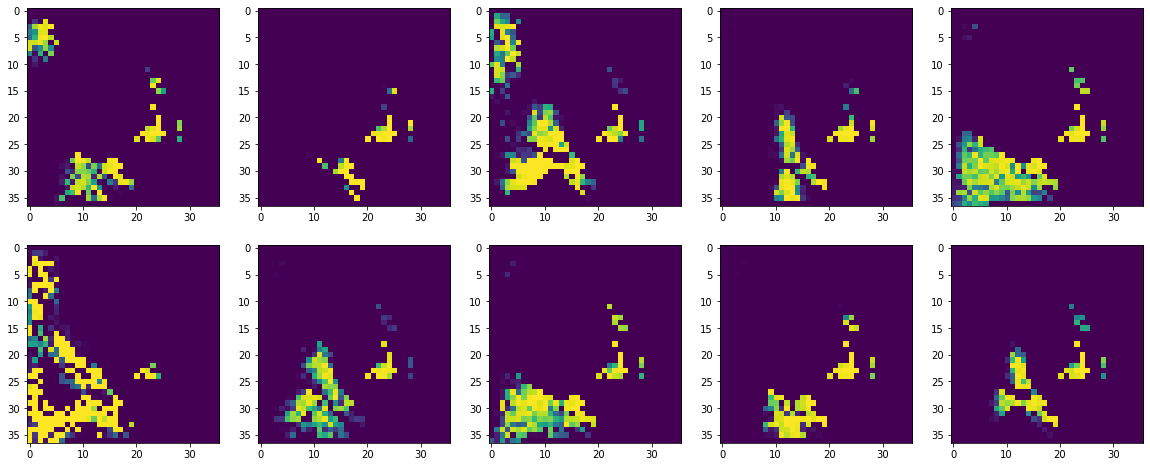

In [13]:
fig = plt.figure(figsize = (20,8))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    ax.imshow(y_pre[i])

In [3]:
model = tf.keras.models.load_model('9_2_model')

In [28]:
X4 = model.encoder(X2_new2[:200000])
X4

<tf.Tensor: shape=(200000, 3), dtype=float32, numpy=
array([[  32.114956,  209.81984 ,   82.16276 ],
       [ 433.94882 ,   62.559498,  177.58757 ],
       [  47.77347 ,  136.95888 ,   49.28638 ],
       ...,
       [ 539.86224 , 1282.4393  ,  449.61606 ],
       [ 575.7287  ,  142.10825 ,  237.53545 ],
       [ 387.8778  ,  119.00638 ,  271.85693 ]], dtype=float32)>

In [24]:
from keras.backend import set_session
from keras.backend import clear_session
from keras.backend import get_session
import tensorflow as tf
import gc
 
# Reset Keras Session
def reset_keras():
    sess = get_session()
    clear_session()
    sess.close()
    sess = get_session()
 
    try:
        del classifier # this is from global space - change this as you need
    except:
        pass
 
    print(gc.collect()) # if it does something you should see a number as output
 
    # use the same config as you used to create the session
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    set_session(tf.compat.v1.Session(config=config))

In [29]:
reset_keras()

100


In [30]:
X6 = model.encoder(X2_new2[200000:400000])
reset_keras()
X7 = model.encoder(X2_new2[400000:600000])
reset_keras()
X8 = model.encoder(X2_new2[600000:800000])
reset_keras()
X9 = model.encoder(X2_new2[800000:1000000])
reset_keras()
X10 = model.encoder(X2_new2[1000000:1200000])
reset_keras()
X11 = model.encoder(X2_new2[1200000:1400000])
reset_keras()
X12 = model.encoder(X2_new2[1400000:1600000])
reset_keras()
X13 = model.encoder(X2_new2[1600000:1800000])
reset_keras()
X14 = model.encoder(X2_new2[1800000:2000000])

100
100
100
100
100
100
100
100


In [31]:
X13

<tf.Tensor: shape=(200000, 3), dtype=float32, numpy=
array([[ 231.63687 ,  185.49014 ,   41.263206],
       [ 410.44574 ,  741.0715  ,  164.23334 ],
       [  98.304665,  285.49393 ,  123.034706],
       ...,
       [ 486.3424  , 1015.60455 ,  366.59644 ],
       [ 417.99564 ,  890.66595 ,  452.91266 ],
       [1065.429   , 1391.9426  ,  587.5108  ]], dtype=float32)>

In [32]:
dump(X4, '/raid/wx_home/learning/2_190w_model_new/3D_data2/1-200000')
dump(X6, '/raid/wx_home/learning/2_190w_model_new/3D_data2/200000-400000')
dump(X7, '/raid/wx_home/learning/2_190w_model_new/3D_data2/400000-600000')
dump(X8, '/raid/wx_home/learning/2_190w_model_new/3D_data2/600000-800000')
dump(X9, '/raid/wx_home/learning/2_190w_model_new/3D_data2/800000-1000000')
dump(X10, '/raid/wx_home/learning/2_190w_model_new/3D_data2/1000000-1200000')
dump(X11, '/raid/wx_home/learning/2_190w_model_new/3D_data2/1200000-1400000')
dump(X12, '/raid/wx_home/learning/2_190w_model_new/3D_data2/1400000-1600000')
dump(X13, '/raid/wx_home/learning/2_190w_model_new/3D_data2/1600000-1800000')
dump(X14, '/raid/wx_home/learning/2_190w_model_new/3D_data2/1800000-2000000')

['/raid/wx_home/learning/2_190w_model_new/3D_data2/1800000-2000000']